In [142]:
%load_ext autoreload
%autoreload 2
import numpy as np
import sympy as sp

from astropy import units as u
from matplotlib import pyplot as plt
from scipy.integrate import quad
from scipy.optimize import approx_fprime

from astropy.cosmology import FlatLambdaCDM
cosmo=FlatLambdaCDM(70, 0.3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
# model consts
h70=1
P0=6.85
c500=1.09
gamma=0.31
alpha=1.07
beta=5.46

gamma_b=4./3.


In [29]:
def E(z): #ratio of the Hubble constant at redshift z to its present value
    return cosmo.H(z)/cosmo.H(0)

In [73]:
def P500(z, M500):
    M500=M500.to(u.Msun)
    return ((1.65*1e-3*E(z)**(8/3)
            *(M500/(3*1e14*h70**(-1)*u.Msun))**2/3 
            *h70**2 * u.keV * u.cm**-3)).to(u.erg/u.cm**3, equivalencies=u.mass_energy()) 

In [452]:
def Pg(x, z, M500): #x=r/r500
    return (P0*P500(z, M500) #units keVcm-3
           / ((c500*x)**gamma  #unitless
              * (1+ (c500*x)**alpha)**((beta-gamma)/alpha))).to(u.erg/u.cm**3, equivalencies=u.mass_energy())

def Pg_r(r, z, M500, R500):
    return Pg(r/R500, z, M500).value

def log_Pg(x, z, M500):
    return np.log((Pg(x, z, M500)).to(u.erg*u.cm**-3).value)

Text(0, 0.5, 'Pg (erg/cm3)')

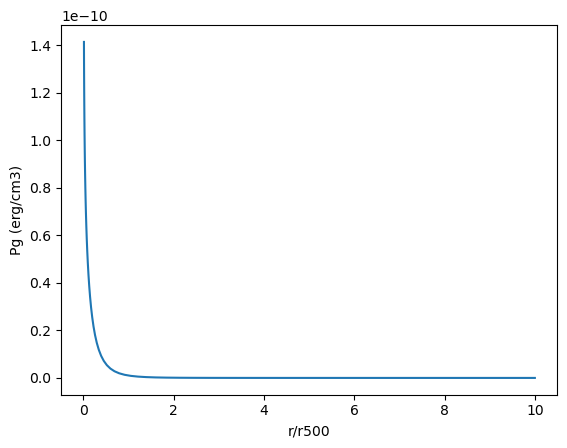

In [177]:
x=np.logspace(-2, 1)
z=3, 
M500=1e14*u.Msun
plt.plot(x, Pg(x, z, M500).to(u.erg*u.cm**-3))
plt.xlabel('r/r500')
plt.ylabel('Pg (erg/cm3)')

Text(0, 0.5, 'dP/dr (erg/(cm3 Mpc))')

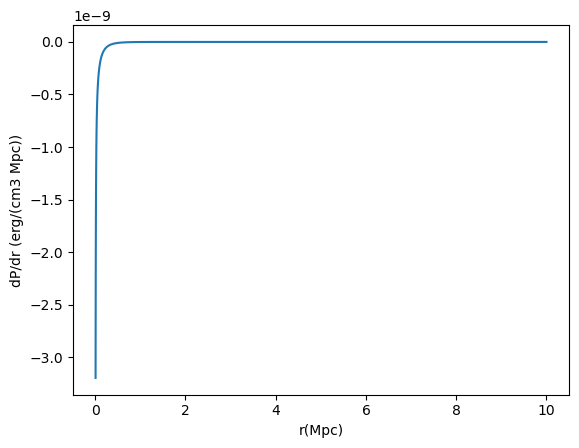

In [182]:
r=np.logspace(-2, 1)*R500
plt.plot(r, dP_dr(r, R500, M500, z))
plt.xlabel('r(Mpc)')
plt.ylabel('dP/dr (erg/(cm3 Mpc))')

In [269]:
dP_dr(rs, R500, M500, z)

[array([ 0.01      ,  0.01151395,  0.01325711,  0.01526418,  0.01757511,
        0.0202359 ,  0.02329952,  0.02682696,  0.03088844,  0.0355648 ,
        0.04094915,  0.04714866,  0.05428675,  0.06250552,  0.07196857,
        0.08286428,  0.09540955,  0.10985411,  0.12648552,  0.14563485,
        0.16768329,  0.19306977,  0.22229965,  0.25595479,  0.29470517,
        0.33932218,  0.39069399,  0.44984327,  0.51794747,  0.59636233,
        0.68664885,  0.79060432,  0.91029818,  1.04811313,  1.20679264,
        1.38949549,  1.59985872,  1.84206997,  2.12095089,  2.44205309,
        2.8117687 ,  3.23745754,  3.72759372,  4.29193426,  4.94171336,
        5.68986603,  6.55128557,  7.54312006,  8.68511374, 10.        ])]


<Quantity [[-2.67893253e-10,  0.00000000e+00,  0.00000000e+00,
             0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
             0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
             0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
             0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
             0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
             0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
             0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
             0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
             0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
             0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
             0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
             0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
             0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
             0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
             0.00000000e+00,  0.00000000e+00,  0.000000

In [181]:
dP_dr(r, R500, M500, z)

<Quantity [-3.19607493e-09, -2.70080783e-09, -2.28630269e-09,
           -1.93890856e-09, -1.64727224e-09, -1.40195275e-09,
           -1.19510148e-09, -1.02019691e-09, -8.71824981e-10,
           -7.45497141e-10, -6.37499965e-10, -5.44770671e-10,
           -4.64793978e-10, -3.95516199e-10, -3.35273050e-10,
           -2.82728012e-10, -2.36818543e-10, -1.96707861e-10,
           -1.61740580e-10, -1.31401177e-10, -1.05275060e-10,
           -8.30128417e-11, -6.42991561e-11, -4.88277569e-11,
           -3.62845532e-11, -2.63396002e-11, -1.86479303e-11,
           -1.28577732e-11, -8.62355121e-12, -5.62040898e-12,
           -3.55715130e-12, -2.18526423e-12, -1.30291405e-12,
           -7.54068469e-13, -4.23827938e-13, -2.31512075e-13,
           -1.23025339e-13, -6.36765702e-14, -3.21465838e-14,
           -1.58535207e-14, -7.64994730e-15, -3.61793515e-15,
           -1.67982873e-15, -7.66995627e-16, -3.44939771e-16,
           -1.53032059e-16, -6.70713495e-17, -2.90796868e-17,
        

In [463]:
def dP_dr(rs, R500, M500, z): #takes only 1 value for r (not list)
    #rs=rs.to(u.Mpc).value
    #if not isinstance(rs, (list)) or np.isscalar(rs):
    #    print('not list or is scalar')
    #    rs = [rs]
    R500=R500.to(u.Mpc).value
    #print(rs)
    #if isinstance(rs, float):
    #    'rs is float'
    #    r=rs
    #    approx_fprime(r, Pg_r, r, z, M500, R500)[0]*(u.erg/(u.cm**3 * u.Mpc))
    #return [approx_fprime([r], Pg_r, z, M500, R500)[0] for r in rs]*(u.erg/(u.cm**3 * u.Mpc))
    gradients=approx_fprime(r, lambda r: Pg_r(r, z, M500, R500))
    return np.array(gradients)*u.erg/(u.cm**3 * u.Mpc)
    
def integrand(r, R500, M500, z, r0, rc):
    #print(r)
    r=r*u.Mpc
    #print('r inside integrand=', r)
    x=r/R500
    #print((Pg(x, z, M500))**((gamma_b-1)/gamma_b))

    #print(r/Pg(x, z, M500))
    #print(dP_dr(r, R500, M500, z))
    #print(1-np.exp(-1*r/r0))
    #print(np.exp(-1*r/rc))
    
    #print(((Pg(x, z, M500))**((gamma_b-1)/gamma_b)).unit)
    #print((1/r).unit)
    #print((r/Pg(x, z, M500)).unit)
    #print(dP_dr(r, R500, M500, z).unit)
    #print((1-np.exp(-1*r/r0)).unit)
    #print((np.exp(-1*r/rc)).unit)

    integrand=(((Pg(x, z, M500))**((gamma_b-1)/gamma_b)).to(u.erg**(1/4)*u.cm**(-3/4))
               *(1/Pg(x, z, M500)).to(u.cm**3/u.erg) 
               #*np.array([dP_dr([rad.value], R500, M500, z).to(u.erg*u.cm**(-3)*u.Mpc**(-1)) for rad in rs]) 
               *dP_dr(r.value, R500, M500, z)
               *(1-np.exp(-1*r/r0)).to(1)
               *(np.exp(-1*r/rc)).to(1))
    #print(integrand)
    return integrand.to(u.erg**(1/4) * u.cm**(-3/4) *u.Mpc**(-1)).value
    
def q(R500, M500, z, r0, rc):
    #print('r inside q=', r)
    rini=0.015*R500.to(u.Mpc).value
    rmax=R500.to(u.Mpc).value
    #print(integrand(rini, R500, M500, z, r0, rc))
    #print('rini, rmax=', rini, rmax)
    integral, _ = quad(integrand, rini, rmax, args=(R500, M500, z, r0, rc))
    #print(integral)
    return integral*(u.erg**(1/4) * u.cm**(-3/4))

In [467]:
def h(Linj, r, r0, rc, q):
    return (Linj/(4*np.pi*r**2)
            *(1-np.exp(-1*r/r0))
            *np.exp(-1*r/rc)
            *(1/q))

In [416]:
def vol_heating_rate(r, R500, M500, z, Linj):
    x=r/R500
    r0=(0.015*R500).to(u.cm)
    rc=(0.1*R500).to(u.cm)
    #print('r inside volheatingrate=', r)
    #print('q=', q(r, R500, M500, z, r0, rc))
    #print('h=', h(Linj, r, r0, rc, q(r, R500, M500, z, r0, rc)))
    #print((Pg(x, z, M500))**((gamma_b-1)/gamma_b))
    #print(dP_dr(r, R500, M500, z))
    return (h(Linj, r, r0, rc, q(R500, M500, z, r0, rc))
        *(Pg(x, z, M500))**((gamma_b-1)/gamma_b)
        *(1/r)
        *(r/Pg(x, z, M500))    
        *dP_dr([r.to(u.Mpc).value], R500, M500, z)) #derivative

In [248]:
r=1*u.Mpc
R500=1*u.Mpc
M500=1e14*u.Msun
z=1
Linj=1e45*u.erg/u.s
vol_heating_rate(r, R500, M500, z, Linj)

<Quantity [2.45496342e+39] erg / (Mpc3 s)>

In [469]:
#integrand(r_vals[0], R500, M500, z, (0.015*R500).to(u.cm), rc=(0.1*R500).to(u.cm))

rs

<Quantity [ 0.01      ,  0.01151395,  0.01325711,  0.01526418,  0.01757511,
            0.0202359 ,  0.02329952,  0.02682696,  0.03088844,  0.0355648 ,
            0.04094915,  0.04714866,  0.05428675,  0.06250552,  0.07196857,
            0.08286428,  0.09540955,  0.10985411,  0.12648552,  0.14563485,
            0.16768329,  0.19306977,  0.22229965,  0.25595479,  0.29470517,
            0.33932218,  0.39069399,  0.44984327,  0.51794747,  0.59636233,
            0.68664885,  0.79060432,  0.91029818,  1.04811313,  1.20679264,
            1.38949549,  1.59985872,  1.84206997,  2.12095089,  2.44205309,
            2.8117687 ,  3.23745754,  3.72759372,  4.29193426,  4.94171336,
            5.68986603,  6.55128557,  7.54312006,  8.68511374, 10.        ] Mpc>

In [470]:
r_vals=np.logspace(-2, 1)
#integrand(r_vals, R500, M500, z, (0.015*R500).to(u.cm), rc=(0.1*R500).to(u.cm))
rini=0.015*R500.to(u.Mpc).value
rmax=R500.to(u.Mpc).value
#quad(integrand, rini, rmax, args=(R500, M500, z, (0.015*R500).to(u.cm), (0.1*R500).to(u.cm)))
Q=q(R500, M500, z, (0.015*R500).to(u.cm), rc=(0.1*R500).to(u.cm))
H=h(Linj, r, (0.015*R500).to(u.cm), (0.1*R500).to(u.cm), Q)
vol_heating_rate(rs, R500, M500, z, Linj )

<Quantity [1.57764918e+48, 1.34009806e+48, 1.13008152e+48, 9.45353092e+47,
           7.83869754e+47, 6.43744314e+47, 5.23200436e+47, 4.20532613e+47,
           3.34073807e+47, 2.62173832e+47, 2.03191067e+47, 1.55498916e+47,
           1.17506284e+47, 8.76887803e+46, 6.46248377e+46, 4.70295927e+46,
           3.37797015e+46, 2.39246540e+46, 1.66837421e+46, 1.14313541e+46,
           7.67537003e+45, 5.03356843e+45, 3.21160705e+45, 1.98433079e+45,
           1.18074130e+45, 6.72218560e+44, 3.63355183e+44, 1.84782510e+44,
           8.74646544e+43, 3.80498491e+43, 1.49888779e+43, 5.25437412e+42,
           1.60610991e+42, 4.18061151e+41, 9.01478137e+40, 1.55976608e+40,
           2.08699504e+39, 2.06936056e+38, 1.44769174e+37, 6.75287434e+35,
           1.96803077e+34, 3.32534549e+32, 2.98940733e+30, 1.29535559e+28,
           2.41522584e+25, 1.70072658e+22, 3.89299645e+18, 2.43786146e+14,
           3.42507493e+09, 8.59368526e+03] erg / (Mpc3 s)>

In [360]:
plt.plot(rs, )

In [413]:

#rs=np.logspace(-2, 1)*R500
#plt.plot(rs, vol_heating_rate(rs, R500, M500, z, Linj))

#[approx_fprime(r.value, Pg_r, r.value, z, M500, R500.value) for r in rs]
#plt.plot(rs, [approx_fprime(r.value, Pg_r, r.value, z, M500, R500.value) for r in rs])

erg(1/4) / cm(3/4)
1 / Mpc
cm3 Mpc / erg
erg / (cm3 Mpc)




TypeError: 'numpy.float64' object is not iterable

In [ ]:
#vol_heating_rate(rs, R500, M500, z, Linj)
#dP_dr(rs, R500, M500, z)

In [74]:
#dP_dr(R500.to(u.cm), R500.to(u.cm), M500.to(u.erg, equivalencies=u.mass_energy()), z)
Pg(1, z, M500)


4.425674802405817e-13 erg / cm3


<Quantity 8.36741046e-14 erg / cm3>

In [83]:
dP_dr(R500, R500, M500, z)

4.425674802405817e-13 erg / cm3
4.425674802405817e-13 erg / cm3


array([-7.60938085e-14])

Text(0, 0.5, 'Pg (erg/cm3)')

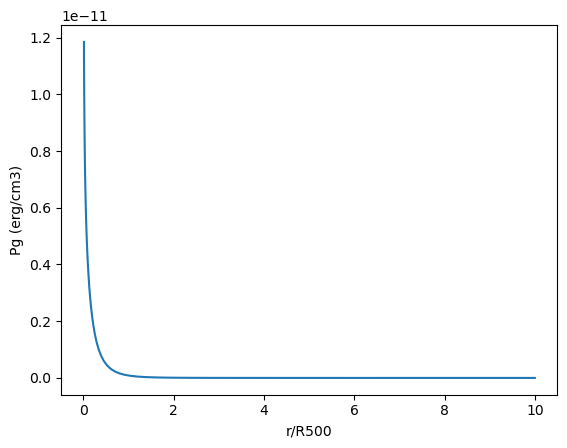

In [175]:
r=np.logspace(-2, 1)*R500
plt.plot(r/R500, Pg(r/R500, 1, M500))
plt.xlabel('r/R500')
plt.ylabel('Pg (erg/cm3)')

In [173]:
dP_dr(r, R500, M500, z)

<Quantity [-2.67893253e-10, -2.26380235e-10, -1.91636641e-10,
           -1.62518256e-10, -1.38073459e-10, -1.17510913e-10,
           -1.00172752e-10, -8.55123473e-11, -7.30758931e-11,
           -6.24871627e-11, -5.34348984e-11, -4.56623798e-11,
           -3.89587771e-11, -3.31519515e-11, -2.81024037e-11,
           -2.36981074e-11, -1.98500008e-11, -1.64879453e-11,
           -1.35570069e-11, -1.10139748e-11, -8.82409798e-12,
           -6.95809100e-12, -5.38952011e-12, -4.09271588e-12,
           -3.04135141e-12, -2.20777089e-12, -1.56305932e-12,
           -1.07773152e-12, -7.22821347e-13, -4.71099607e-13,
           -2.98158477e-13, -1.83167653e-13, -1.09209543e-13,
           -6.32056068e-14, -3.55250260e-14, -1.94052155e-14,
           -1.03119166e-14, -5.33733529e-15, -2.69450907e-15,
           -1.32883343e-15, -6.41214400e-16, -3.03253346e-16,
           -1.40802326e-16, -6.42891540e-17, -2.89126630e-17,
           -1.28270635e-17, -5.62188384e-18, -2.43744344e-18,
        

In [160]:
Pg_r(r, z, M500, R500)

<Quantity [1.18448042e-11, 1.12685413e-11, 1.07096530e-11, 1.01667494e-11,
           9.63847502e-12, 9.12351554e-12, 8.62060964e-12, 8.12856396e-12,
           7.64627313e-12, 7.17274519e-12, 6.70713303e-12, 6.24877193e-12,
           5.79722322e-12, 5.35232281e-12, 4.91423280e-12, 4.48349248e-12,
           4.06106388e-12, 3.64836449e-12, 3.24727870e-12, 2.86013763e-12,
           2.48965748e-12, 2.13882828e-12, 1.81074936e-12, 1.50841584e-12,
           1.23447004e-12, 9.90942960e-13, 7.79020555e-13, 5.98873232e-13,
           4.49583382e-13, 3.29191972e-13, 2.34864057e-13, 1.63149181e-13,
           1.10293219e-13, 7.25493910e-14, 4.64407789e-14, 2.89425821e-14,
           1.75736324e-14, 1.04063024e-14, 6.01670393e-15, 3.40124321e-15,
           1.88267552e-15, 1.02198871e-15, 5.44925585e-16, 2.85846964e-16,
           1.47741865e-16, 7.53508695e-17, 3.79746326e-17, 1.89358563e-17,
           9.35371692e-18, 4.58214102e-18] erg / cm3>

In [169]:
epsilon=np.sqrt(np.finfo(float).eps)*u.Mpc
(Pg_r(r+epsilon, z, M500, R500) - Pg_r(r, z, M500, R500))/epsilon

<Quantity [-4.15266395e-10, -3.49525472e-10, -2.94644864e-10,
           -2.48791958e-10, -2.10442554e-10, -1.78328909e-10,
           -1.51396580e-10, -1.28768571e-10, -1.09715585e-10,
           -9.36313375e-11, -8.00120988e-11, -6.84397575e-11,
           -5.85678107e-11, -5.01097888e-11, -4.28296873e-11,
           -3.65340474e-11, -3.10653657e-11, -2.62965469e-11,
           -2.21261521e-11, -1.84742159e-11, -1.52784451e-11,
           -1.24906529e-11, -1.00733478e-11, -7.99646853e-12,
           -6.23433979e-12, -4.76300156e-12, -3.55810590e-12,
           -2.59357279e-12, -1.84111882e-12, -1.27064957e-12,
           -8.51345195e-13, -5.53141764e-13, -3.48248491e-13,
           -2.12374237e-13, -1.25453300e-13, -7.18131846e-14,
           -3.98655430e-14, -2.14847733e-14, -1.12561217e-14,
           -5.74182594e-15, -2.85667132e-15, -1.38869878e-15,
           -6.60847965e-16, -3.08424304e-16, -1.41429371e-16,
           -6.38313954e-17, -2.84022026e-17, -1.24785702e-17,
        

In [107]:
#plt.plot(r, dP_dr(r, R500, M500, z)[0])
#plt.xscale('log')
#plt.yscale('symlog')

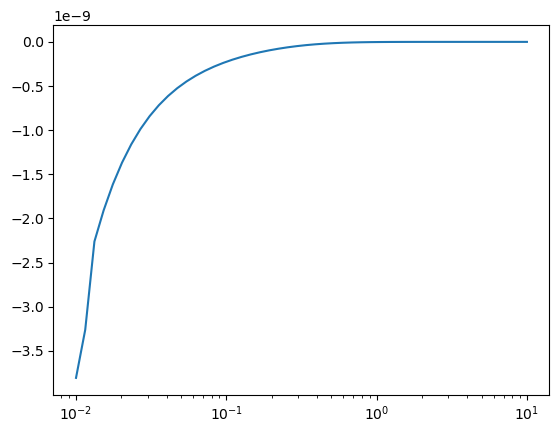

In [138]:
dr = np.insert(np.diff(r), 0, 0.9*np.diff(r)[0])
plt.plot(r, np.gradient(Pg(r/R500, 1, M500), dr))
plt.xscale('log')


In [139]:
dr

<Quantity [0.00136256, 0.00151395, 0.00174316, 0.00200707, 0.00231093,
           0.00266079, 0.00306362, 0.00352744, 0.00406148, 0.00467637,
           0.00538435, 0.00619951, 0.00713809, 0.00821876, 0.00946305,
           0.01089571, 0.01254527, 0.01444457, 0.01663141, 0.01914933,
           0.02204845, 0.02538648, 0.02922988, 0.03365514, 0.03875038,
           0.04461701, 0.05137182, 0.05914927, 0.0681042 , 0.07841486,
           0.09028651, 0.10395548, 0.11969386, 0.13781496, 0.15867951,
           0.18270285, 0.21036323, 0.24221125, 0.27888092, 0.32110221,
           0.3697156 , 0.42568884, 0.49013618, 0.56434054, 0.6497791 ,
           0.74815267, 0.86141954, 0.99183449, 1.14199367, 1.31488626] Mpc>

In [131]:
np.diff(r)[0]

<Quantity 0.00151395 Mpc>

In [126]:
np.gradient(r, np.concatenate(Pg(r/R500, 1, M500), Pg(r/R500, 1, M500)[:-1]))

TypeError: only integer dimensionless scalar quantities can be converted to a Python index

In [115]:
Pg(r/R500, 1, M500)

<Quantity [1.18448042e-11, 1.12685413e-11, 1.07096530e-11, 1.01667494e-11,
           9.63847502e-12, 9.12351554e-12, 8.62060964e-12, 8.12856396e-12,
           7.64627313e-12, 7.17274519e-12, 6.70713303e-12, 6.24877193e-12,
           5.79722322e-12, 5.35232281e-12, 4.91423280e-12, 4.48349248e-12,
           4.06106388e-12, 3.64836449e-12, 3.24727870e-12, 2.86013763e-12,
           2.48965748e-12, 2.13882828e-12, 1.81074936e-12, 1.50841584e-12,
           1.23447004e-12, 9.90942960e-13, 7.79020555e-13, 5.98873232e-13,
           4.49583382e-13, 3.29191972e-13, 2.34864057e-13, 1.63149181e-13,
           1.10293219e-13, 7.25493910e-14, 4.64407789e-14, 2.89425821e-14,
           1.75736324e-14, 1.04063024e-14, 6.01670393e-15, 3.40124321e-15,
           1.88267552e-15, 1.02198871e-15, 5.44925585e-16, 2.85846964e-16,
           1.47741865e-16, 7.53508695e-17, 3.79746326e-17, 1.89358563e-17,
           9.35371692e-18, 4.58214102e-18] erg / cm3>